<a href="https://colab.research.google.com/github/Brunoreos079/Projetos-Data-Science/blob/main/AnaliseVendasChapasRodoviarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste projeto vamos realizar uma analise nas vendas de um produto especifico numa industria de Implementos Rodoviários.

O produto no caso seriam Chapas de Aluminio e elas podem ser produzidas em varias configurações, tamanhos e quantidades.

Este projeto faz parte de um projeto de maior escala, em que cada Notebook representa a análise de um determinado aspecto deste caso. Os dados são reais e foram coletados pelo autor enquanto trabalhava nesta empresa em SP.

O objetivo deste Notebook será analisar o desempenho das vendedoras com estes produtos nos meses de Fevereiro, Março e Abril de 2024.

Irei começar importando o pandas e tambem os meus dados

Os dados estão divididos em:

* Dados das chapas pedidas por cada cliente





In [ ]:
import pandas as pd
df_Fev = pd.read_csv('Chapas_Fev.CSV',sep=';',encoding = 'latin-1')
df_Mar = pd.read_csv('Chapas_Mar.CSV',sep=';',encoding = 'latin-1')
df_Abr = pd.read_csv('Chapas_Abr.CSV',sep=';',encoding = 'latin-1')
df_Total = pd.read_csv('Chapas_Fev_Mar_Abr.CSV',sep=';',encoding = 'latin-1')


In [ ]:
df_Fev.head()

,Cliente,Vendedora,Quantidade,Tipo,Marca,Saida,Frisos,Final,Corte,Data,Semana
0,Formiga,Natalice,1,Branca Galvanizada,Facchini,100.0,9,100.0,696.0,01-02-2024,1
1,Antonio Menezes,Neide,2,"0,8",Lisa,NaN,NaN,NaN,2600.0,01-02-2024,1
2,Elos de ouro,Ricardo,1,"0,8",Lisa,NaN,NaN,NaN,2620.0,01-02-2024,1
3,Auto Sider,Neide,2,"0,8",Edarp,100.0,49,100.0,2715.0,01-02-2024,1
4,Balcão Chicão,Fernanda,4,"0,8",Randon,100.0,9,100.0,650.0,01-02-2024,1


In [ ]:
df_Mar.head()

,Cliente,Vendedora,Quantidade,Tipo,Marca,Saída,Frisos,Final,Corte,Data,Semana
0,Joao Pedro,Fernanda,2,0.8,Carbus,100.0,31,100.0,1808,01-03-2024,1
1,RBV Truck,Flavia,1,Branca Aluminio,Randon,100.0,16,100.0,1012,01-03-2024,1
2,SB Truck,Flavia,1,0.7,Lisa,NaN,NaN,NaN,3000,01-03-2024,1
3,Xandal,Fernanda,3,0.8,Lisa,NaN,NaN,NaN,3000,01-03-2024,1
4,Leo Car,Neide,26,0.8,Randon,80.0,52,90.0,2854,01-03-2024,1


In [ ]:
df_Abr.head()

,Cliente,Vendedora,Quantidade,Tipo,Marca,Saída,Frisos,Final,Corte,Data,Semana,Unnamed: 11
0,Japones,Renan,1.0,Branca Aluminio,Lisa,NaN,NaN,NaN,2350.0,01-04-24,1.0,NaN
1,TransRodut,Ricardo,1.0,Branca Aluminio,Lisa,NaN,NaN,NaN,2900.0,01-04-24,1.0,NaN
2,Galvao,Priscila,2.0,0.8,Lisa,NaN,NaN,NaN,6000.0,01-04-24,1.0,NaN
3,Jose Roberto Nei,Neide,1.0,0.7,Carbus,100.0,12,100.0,815.0,01-04-24,1.0,NaN
4,Rijus,Fernanda,1.0,0.8,Randon,100.0,34,100.0,1950.0,01-04-24,1.0,NaN


Observando minhas bases de dados observamos alguns problemas:

* Existem dados com o valor Nulo (Nan) e isso precisa ser resolvido;
* O dataframe de abril possui uma coluna a mais que nao possue nenhum valor relevante.

A seguir vamos resolver estes dois problemas


In [ ]:
df_Abr = df_Abr.drop(['Unnamed: 11'],axis=1)

Iremos utilizar uma função do numpay, a replace. Para substituir os valores nulos por 0


In [ ]:
import numpy as np
df_Fev.replace(np.nan, 0 , inplace = True)
df_Mar.replace(np.nan, 0 , inplace = True)
df_Abr.replace(np.nan, 0 , inplace = True)


In [ ]:
df_Abr.head()

,Cliente,Vendedora,Quantidade,Tipo,Marca,Saída,Frisos,Final,Corte,Data,Semana
0,Japones,Renan,1.0,Branca Aluminio,Lisa,0.0,0,0.0,2350.0,01-04-24,1.0
1,TransRodut,Ricardo,1.0,Branca Aluminio,Lisa,0.0,0,0.0,2900.0,01-04-24,1.0
2,Galvao,Priscila,2.0,0.8,Lisa,0.0,0,0.0,6000.0,01-04-24,1.0
3,Jose Roberto Nei,Neide,1.0,0.7,Carbus,100.0,12,100.0,815.0,01-04-24,1.0
4,Rijus,Fernanda,1.0,0.8,Randon,100.0,34,100.0,1950.0,01-04-24,1.0


In [ ]:
print("Shape Fevereiro:\n",df_Fev.shape,"\nShape Março:\n", df_Mar.shape,"\nShape Abril:\n", df_Abr.shape)

Shape Fevereiro:
 (484, 11) 
Shape Março:
 (541, 11) 
Shape Abril:
 (644, 11)


Uma primeiro analise possivel é olhar o tamanho dos dataframes o que indica a quantidade de produtos vendidos, no caso este dado mostra apenas a quantidade de vezes que o cliente fez pedidos, mas nao leve em consideração a quantidade de produtos em cada pedido.

Mesmo com essa limitação ja é possivel afirmar que provavelmente houve um aumento de pedidos de fevereiro até abril por conta do tamanho dos dfs.


Agora iremos analisar por vendedora. Iremos  agrupar os dados dos dataframes utilizando "Vendedora" como parametro, e somar os dados da coluna "Quantidade" para obtermos o numero total de chapas (independente dos pedidos) de cada vendedora. Depois iremos plotar estes valores em Graficos de barras para comparação e visualização

In [ ]:
def analise(df_mes,Parametro1,Parametro2):


 return  df_mes[[Parametro1,Parametro2]].groupby(Parametro1).sum().sort_values(Parametro2,ascending = False)


<Axes: title={'center': 'Quantidade de Chapas x TOP 10 Clientes(Fev_2024)'}, xlabel='Clientes', ylabel='Quantidade de Chapas'>

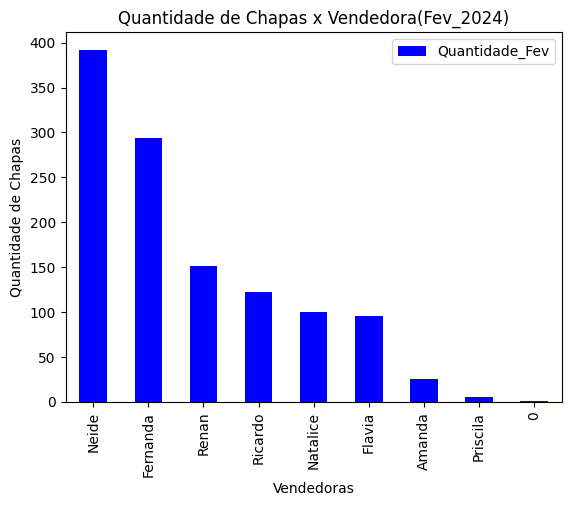

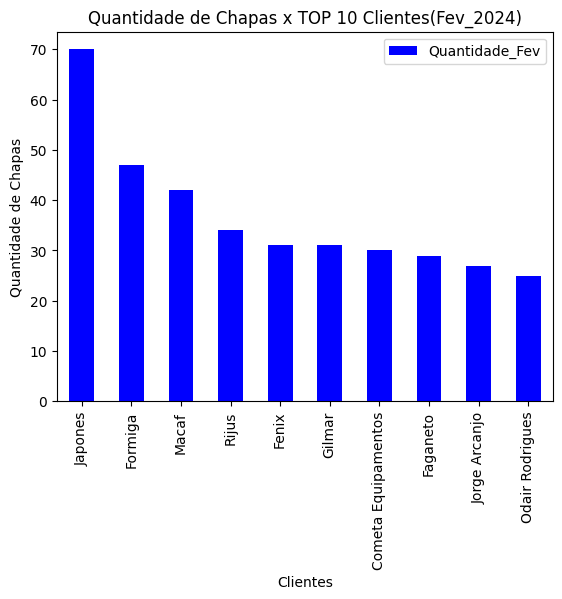

In [ ]:
df_analise_Quan_Ven_Fev = analise(df_Fev,'Vendedora','Quantidade').rename(columns={'Quantidade':'Quantidade_Fev'})
df_analise_Quan_Ven_Fev.plot(kind='bar',color='blue',title = 'Quantidade de Chapas x Vendedora(Fev_2024)',ylabel='Quantidade de Chapas',xlabel='Vendedoras')

df_analise_Quan_Clien_Fev = analise(df_Fev,'Cliente','Quantidade').rename(columns={'Quantidade':'Quantidade_Fev'})
df_analise_Quan_Clien_Fev.head(10).plot(kind='bar',color='blue',title = 'Quantidade de Chapas x TOP 10 Clientes(Fev_2024)',ylabel='Quantidade de Chapas',xlabel='Clientes')

<Axes: title={'center': 'Quantidade de Chapas x TOP 10 Clientes(Mar_2024)'}, xlabel='Clientes', ylabel='Quantidade de Chapas'>

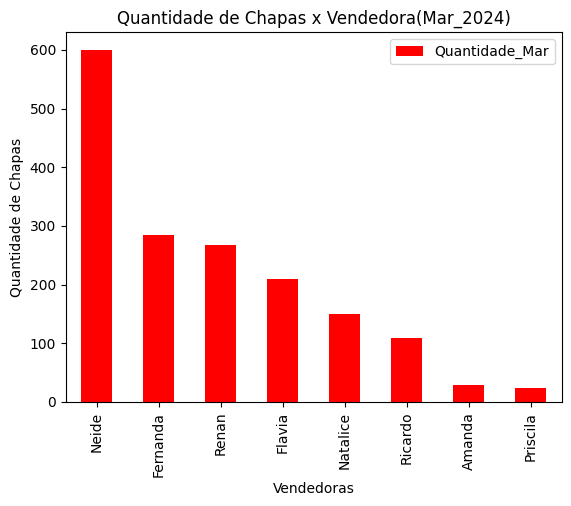

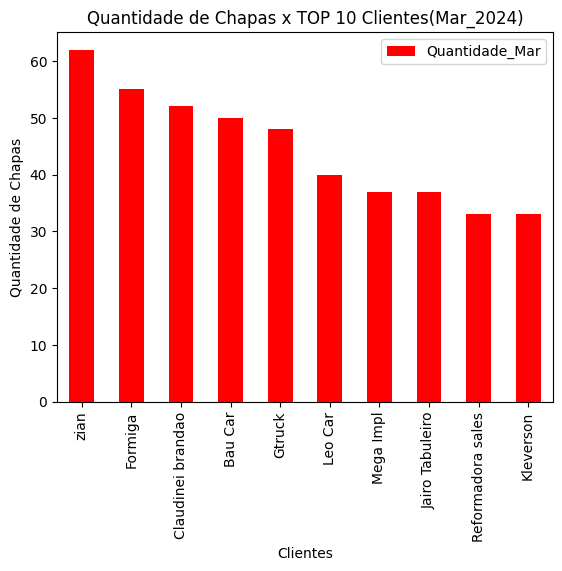

In [ ]:
df_analise_Quan_Ven_Mar = analise(df_Mar,'Vendedora','Quantidade').rename(columns={'Quantidade':'Quantidade_Mar'})
df_analise_Quan_Ven_Mar.plot(kind='bar',color='red',title = 'Quantidade de Chapas x Vendedora(Mar_2024)',ylabel='Quantidade de Chapas',xlabel='Vendedoras')

df_analise_Quan_Clien_Mar = analise(df_Mar,'Cliente','Quantidade').rename(columns={'Quantidade':'Quantidade_Mar'})
df_analise_Quan_Clien_Mar.head(10).plot(kind='bar',color='red',title = 'Quantidade de Chapas x TOP 10 Clientes(Mar_2024)',ylabel='Quantidade de Chapas',xlabel='Clientes')

<Axes: title={'center': 'Quantidade de Chapas x TOP 10 Clientes(Abr_2024)'}, xlabel='Clientes', ylabel='Quantidade de Chapas'>

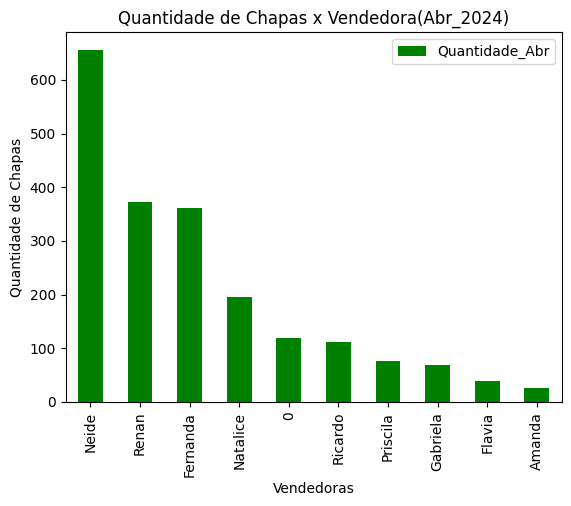

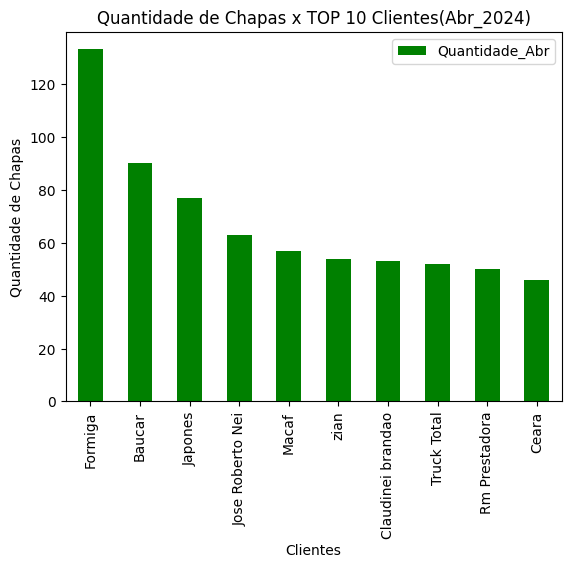

In [ ]:
df_analise_Quan_Ven_Abr = analise(df_Abr,'Vendedora','Quantidade').rename(columns={'Quantidade':'Quantidade_Abr'})
df_analise_Quan_Ven_Abr.plot(kind='bar',color='green',title = 'Quantidade de Chapas x Vendedora(Abr_2024)',ylabel='Quantidade de Chapas',xlabel='Vendedoras')

df_analise_Quan_Clien_Abr = analise(df_Abr,'Cliente','Quantidade').rename(columns={'Quantidade':'Quantidade_Abr'})
df_analise_Quan_Clien_Abr.head(10).plot(kind='bar',color='green',title = 'Quantidade de Chapas x TOP 10 Clientes(Abr_2024)',ylabel='Quantidade de Chapas',xlabel='Clientes')

<Axes: title={'center': 'Quantidade de Chapas x TOP 10 Clientes(Fev_Mar_Abr_2024)'}, xlabel='Clientes', ylabel='Quantidade de Chapas'>

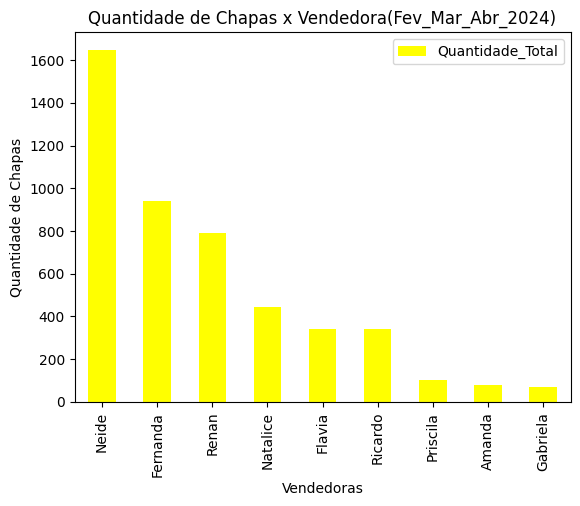

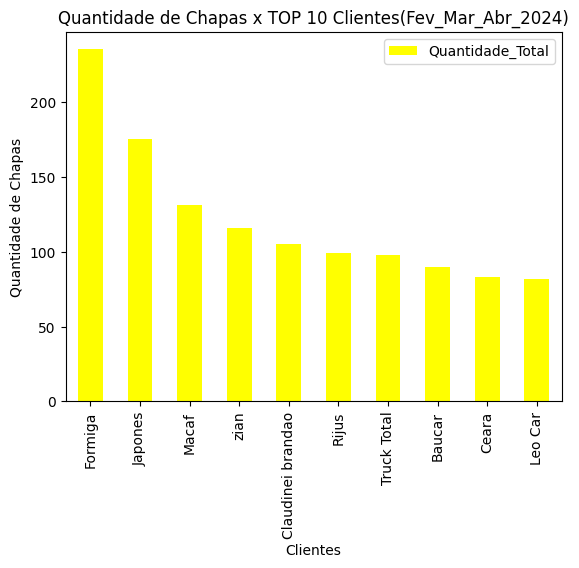

In [ ]:
df_analise_Quan_Ven_Total = analise(df_Total,'Vendedora','Quantidade').rename(columns={'Quantidade':'Quantidade_Total'})
df_analise_Quan_Ven_Total.plot(kind='bar',color='yellow',title = 'Quantidade de Chapas x Vendedora(Fev_Mar_Abr_2024)',ylabel='Quantidade de Chapas',xlabel='Vendedoras')

df_analise_Quan_Clien_Total = analise(df_Total,'Cliente','Quantidade').rename(columns={'Quantidade':'Quantidade_Total'})
df_analise_Quan_Clien_Total.head(10).plot(kind='bar',color='yellow',title = 'Quantidade de Chapas x TOP 10 Clientes(Fev_Mar_Abr_2024)',ylabel='Quantidade de Chapas',xlabel='Clientes')

Com as analises acima fica possivel verificar quais vendedores fizeram mais vendas em cada um dos meses.

Quais clientes compraram mais em casa um dos meses

E um panorama geral dos 3 meses tanto sobre clientes como sobre os vendedores


Com estes dados seria possivel verificar quais vendedores estã mantendo uma certa constancia.

Quais clientes estão mantendo uma média de compras por mês.

E verificar por exemplo quais clientes diminuiram suas compras e assim tomar atitudes sobre isso, tentar entender os motivos, realizar uma reaproximação entre a empresa e o cliente.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.concat([df_analise_Quan_Ven_Fev, df_analise_Quan_Ven_Mar, df_analise_Quan_Ven_Abr], axis=1)

<Axes: xlabel='Vendedora'>

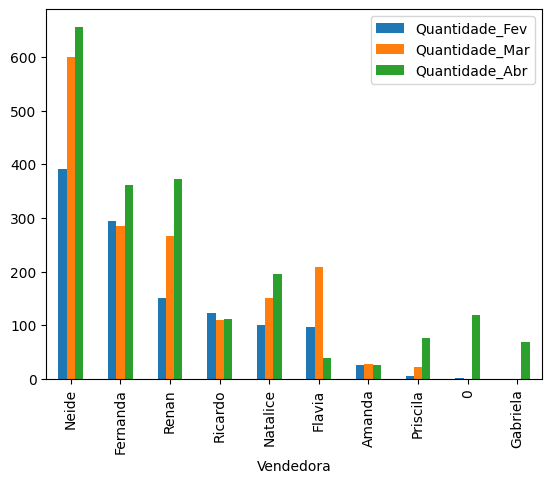

In [ ]:
df.plot(kind='bar')

Este grafico foi construido Concatendo os dataframes de cada mes, para assim podermos ter um Dataframe que representasse justamente as mudanças entre as quantidades vendidas por cada vendedora em cada um dos 3 meses, possibilitando verificar se as vendas estão aumentando, diminuindo ou se mantendo constantes.


A partir deste grafico foi possivel perceber que a maioria dos vendedores aumentaram suas vendas ao passar dos meses, oque pode indicar alguns aspectos como:
* Sucesso de alguma ação tomada pelo time de vendas;
* Sucesso de alguma ação de marketing executado nestes meses;
* Aumento no numero de pedidos por conta de algum fator externo do lado dos clientes;
* Sucesso de alguma ação do time de qualidade;

Estes são alguns exemplos do que se pode tirar de conclusão utilizando este tipo de analise de dados.

Estas informações seriam complementares com as informações dos outros times, assim possibilitando um maior entendimento da empresa.
